# CSI 4106 - Introduction to Artificial Intelligence
## Taught by: Dr. Caroline Barrière


## PROJECT 1 - Classification Empirical Study
## Title: Pistachio Classification

### By: Muhammed Melik Izol (300043365), Eric Dam (300012511)
### Group Number: 98

### Dataset used:
https://www.kaggle.com/datasets/muratkokludataset/pistachio-dataset


# Section 0: Introduction

Pistachios are a type of cashew and are seeds of pistachio trees.
They originate from Central to Western Asia and are typically used in sweets such as baklava. 

<img src="pistachio_tree.jpg"/>
Figure 1: Pistachio Tree

<img src="pistachio_branch.jpg"/>
Figure 2: Pistachios in a branch

Pistachios have 4 layers to them. 
- outer skin/soft hull (mesocarp)
- hard shell (endocarp)
- seed coat (testa)
- seed (kernel) 
<img src="pistachio_layers.jpg"/>
Figure 3: Pistachio Layers


In this notebook, we will look at two types of pistachios:
- The Siirt Pistachios from Siirt Province located in Eastern Turkey
- The Kirmizi Pistachios from Gaziantep/Sanliurfa Provinces located in South Eastern Turkey 

The differences between these two types of pistachios are their shape, size and the colour of their outer skin.

Siirt pistachios are typically larger in size, more round/circular in shape, and have yellow outer skins. 

Kirmizi pistachios are smaller in size, more slim/cylindrical in shape and have red outer skins. 

(Fun fact: Kirmizi means "red" in Turkish)


<img src="siirt_outer_skin.jpg"/>
Figure 4: Siirt Pistachios with and without their outer skin


<img src="kirmizi_outer_skin.jpg"/>
Figure 5: Kirmizi Pistachios with and without their outer skin

# Section 1: Understanding the classification for the dataset

## a) Classification Type:
The classification is a Binary Classification since there are 2 categories to classify the pistachios as with the given data. The 2 types of pistachios in this dataset are Kirmizi Pistachios and Siirt Pistachios. 

## b) What is the goal? Is this for a particular application? 
The first goal of this project is to familiarize ourselves with various machine learning methods and learn how to do an Emprical Study on a given dataset. 

The goal in picking this particular dataset was:
- To see the application of data analysis/science and machine learning in farming.  
- To get exposed to image classification on the surface. 
- Curiosity as the family of one of the team members has a pistachio tree farm in Sanliurfa Province of Turkey 

This dataset has provided us with images as well as an excel file with pre-defined features and data on the features of the given images. This has given us the option to pick and choose which we would like to use. We were both interested in image classification but following the advice of Dr. Barrière, we opted to use a dataset where both the features and the images were provided. This way we can see how features and data with numbers are produced from an image without having to do the complex work ourselves. 

In [1]:
# General imports of libraries/packages
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error
import numpy as np
import math

import lightgbm as lgb

In [2]:
# Setting the max number of columns that gets displayed to 30
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 2148)

In [3]:
# reading the dataset
df = pd.read_excel("Pistachio_28_Features_Dataset.xlsx")

# Section 2: Analysis of Dataset

There are two data sets that we can use. One has 28 features available the other has 16 features available. 

We picked the 28 feature data set as it already encompasses the 16 features and pixel RGB information on top of it. We can always take out features we don't need if necessary. 

In [4]:
# Seeing what the data looks like
df.head()

Area  Perimeter  Major_Axis  Minor_Axis  Eccentricity   Eqdiasq  Solidity  \
0  63391   1568.405    390.3396    236.7461        0.7951  284.0984    0.8665   
1  68358   1942.187    410.8594    234.7525        0.8207  295.0188    0.8765   
2  73589   1246.538    452.3630    220.5547        0.8731  306.0987    0.9172   
3  71106   1445.261    429.5291    216.0765        0.8643  300.8903    0.9589   
4  80087   1251.524    469.3783    220.9344        0.8823  319.3273    0.9657   

   Convex_Area  Extent  Aspect_Ratio  Roundness  Compactness  Shapefactor_1  \
0        73160  0.6394        1.6488     0.3238       0.7278         0.0062   
1        77991  0.6772        1.7502     0.2277       0.7181         0.0060   
2        80234  0.7127        2.0510     0.5951       0.6767         0.0061   
3        74153  0.7028        1.9879     0.4278       0.7005         0.0060   
4        82929  0.7459        2.1245     0.6425       0.6803         0.0059   

   Shapefactor_2  Shapefactor_3  Shapefactor_4   Mean_RR   Mean_RG   Mean_RB  \
0         0.0037         0.5297         0.8734  195.9932  180.2673  165.3167   
1         0.0034         0.5156         0.9024  222.5941  208.6210  187.3744   
2         0.0030         0.4579         0.9391  213.3581  202.9122  187.7118   
3         0.0030         0.4907         0.9755  211.8630  205.4264  187.9537   
4         0.0028         0.4628         0.9833  229.5648  217.5896  194.4906   

   StdDev_RR  StdDev_RG  StdDev_RB  Skew_RR  Skew_RG  Skew_RB  Kurtosis_RR  \
0    17.7206    19.6024    21.1342   0.4581   0.6635   0.7591       2.9692   
1    26.7061    27.2112    25.1035  -0.3847  -0.2713  -0.2927       1.9807   
2    19.0129    20.0703    20.7006  -0.6014  -0.4500   0.2998       3.5420   
3    18.1773    18.7152    29.7883  -0.6943  -0.6278  -0.7798       2.8776   
4    23.4298    24.0878    23.1157  -0.9287  -0.8134  -0.4970       2.9915   

   Kurtosis_RG  Kurtosis_RB              Class  
0       3.0576       2.9542  Kirmizi_Pistachio  
1       2.1006       2.2152  Kirmizi_Pistachio  
2       3.6856       4.1012  Kirmizi_Pistachio  
3       2.8748       2.8953  Kirmizi_Pistachio  
4       2.8813       2.7362  Kirmizi_Pistachio

### Checking general information of dataframe
- It can be seen that there are no null values and so no missing data in the dataset which is good.

- The dataset has 29 columns in total, numbered 0-28. One of which called "Class" is the classification column. The remaining 28 columns are all features of the dataset. 

- The data type of the features are all float with the exception of "Area" and "Convex_Area" columns, which are int. 

- Looking through the data, it is clear that all the features are continuous

- As mentioned earlier, this is a binary classification since there are only two types of pistachios in the dataset which are Kirmizi Pistachios and Siirt Pistachios. 

- There are a total of 2148 images present in the dataset, each corresponding to one row of data. 

- Out of these 2148 rows of data, 1232 belong to Kirmizi Pistachios and 916 belong to Siirt Pistachios. 

- Kirmizi Pistachios make up about 57.4% of the data and Siirt Pistachios make up about 42.6% of the data, which means our data is imbalanced

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Area           2148 non-null   int64  
 1   Perimeter      2148 non-null   float64
 2   Major_Axis     2148 non-null   float64
 3   Minor_Axis     2148 non-null   float64
 4   Eccentricity   2148 non-null   float64
 5   Eqdiasq        2148 non-null   float64
 6   Solidity       2148 non-null   float64
 7   Convex_Area    2148 non-null   int64  
 8   Extent         2148 non-null   float64
 9   Aspect_Ratio   2148 non-null   float64
 10  Roundness      2148 non-null   float64
 11  Compactness    2148 non-null   float64
 12  Shapefactor_1  2148 non-null   float64
 13  Shapefactor_2  2148 non-null   float64
 14  Shapefactor_3  2148 non-null   float64
 15  Shapefactor_4  2148 non-null   float64
 16  Mean_RR        2148 non-null   float64
 17  Mean_RG        2148 non-null   float64
 18  Mean_RB 

In [6]:
df.columns

Index(['Area', 'Perimeter', 'Major_Axis', 'Minor_Axis', 'Eccentricity',
       'Eqdiasq', 'Solidity', 'Convex_Area', 'Extent', 'Aspect_Ratio',
       'Roundness', 'Compactness', 'Shapefactor_1', 'Shapefactor_2',
       'Shapefactor_3', 'Shapefactor_4', 'Mean_RR', 'Mean_RG', 'Mean_RB',
       'StdDev_RR', 'StdDev_RG', 'StdDev_RB', 'Skew_RR', 'Skew_RG', 'Skew_RB',
       'Kurtosis_RR', 'Kurtosis_RG', 'Kurtosis_RB', 'Class'],
      dtype='object')

In [7]:
# Columns that will be our features
FEATURES = ['Area', 'Perimeter', 'Major_Axis', 'Minor_Axis', 'Eccentricity',
       'Eqdiasq', 'Solidity', 'Convex_Area', 'Extent', 'Aspect_Ratio',
       'Roundness', 'Compactness', 'Shapefactor_1', 'Shapefactor_2',
       'Shapefactor_3', 'Shapefactor_4', 'Mean_RR', 'Mean_RG', 'Mean_RB',
       'StdDev_RR', 'StdDev_RG', 'StdDev_RB', 'Skew_RR', 'Skew_RG', 'Skew_RB',
       'Kurtosis_RR', 'Kurtosis_RG', 'Kurtosis_RB']

# The column we'll be predicting for
TARGET = "Class"

In [8]:
description = df.describe()
description

Area    Perimeter   Major_Axis   Minor_Axis  Eccentricity  \
count    2148.000000  2148.000000  2148.000000  2148.000000   2148.000000   
mean    79950.655493  1425.971751   446.248968   238.311842      0.840219   
std     13121.737799   375.565503    32.445304    30.310695      0.048759   
min     29808.000000   858.363000   320.344500   133.509600      0.504900   
25%     71936.750000  1170.996250   426.508750   217.875825      0.817500   
50%     79905.500000  1262.785500   448.574750   236.416350      0.849650   
75%     89030.500000  1607.906250   468.509400   257.760150      0.875200   
max    124008.000000  2755.049100   541.966100   383.046100      0.946000   

           Eqdiasq     Solidity    Convex_Area       Extent  Aspect_Ratio  \
count  2148.000000  2148.000000    2148.000000  2148.000000   2148.000000   
mean    317.919173     0.940093   85015.839851     0.716067      1.898154   
std      26.908600     0.050452   13154.919327     0.052532      0.240100   
min     194.814600     0.588000   37935.000000     0.427200      1.158500   
25%     302.642850     0.919850   76467.000000     0.687000      1.736375   
50%     318.965300     0.954150   85075.500000     0.726500      1.896250   
75%     336.685525     0.976925   93893.500000     0.753600      2.067025   
max     397.356100     0.995100  132478.000000     0.820400      3.085800   

         Roundness  Compactness  Shapefactor_1  Shapefactor_2  Shapefactor_3  \
count  2148.000000  2148.000000    2148.000000    2148.000000    2148.000000   
mean      0.569172     0.713077       0.005701       0.003017       0.510461   
std       0.212760     0.044547       0.000817       0.000340       0.063942   
min       0.062800     0.476000       0.004000       0.002400       0.226600   
25%       0.371250     0.681550       0.005200       0.002800       0.464475   
50%       0.643400     0.710700       0.005600       0.003000       0.505150   
75%       0.744125     0.741650       0.006100       0.003200       0.550075   
max       0.933600     0.877900       0.013100       0.005300       0.770600   

       Shapefactor_4      Mean_RR      Mean_RG      Mean_RB    StdDev_RR  \
count    2148.000000  2148.000000  2148.000000  2148.000000  2148.000000   
mean        0.955239   218.067505   207.973008   191.995311    21.380084   
std         0.051840    10.793178    12.073221    13.030505     3.127813   
min         0.620400   167.191300   162.623000   146.787600    10.611100   
25%         0.944000   211.608950   200.437100   182.930675    19.253550   
50%         0.973100   219.529800   208.885000   192.036350    21.425100   
75%         0.987300   225.941500   216.494700   201.097725    23.695900   
max         0.999000   241.275200   240.506500   235.000700    30.838300   

         StdDev_RG    StdDev_RB      Skew_RR      Skew_RG      Skew_RB  \
count  2148.000000  2148.000000  2148.000000  2148.000000  2148.000000   
mean     22.591454    22.427056    -0.735243    -0.615580    -0.367142   
std       3.622222     3.926325     0.384584     0.389219     0.426964   
min      11.985400    11.197100    -1.931600    -1.658200    -2.348600   
25%      20.036675    19.722425    -0.990900    -0.875975    -0.645800   
50%      22.523250    22.276900    -0.756600    -0.653050    -0.424550   
75%      25.241900    25.140125    -0.502500    -0.405000    -0.158400   
max      33.614600    42.756600     1.865400     2.257600     1.852100   

       Kurtosis_RR  Kurtosis_RG  Kurtosis_RB  
count  2148.000000  2148.000000  2148.000000  
mean      3.054000     2.903015     2.940572  
std       0.733993     0.651383     0.750171  
min       1.662400     1.665500     1.522500  
25%       2.509700     2.437400     2.449425  
50%       2.941750     2.807050     2.783350  
75%       3.446500     3.247400     3.224650  
max       8.890600    10.453900    11.533900

In [9]:
df.loc[df['Class']=='Kirmizi_Pistachio']

Area  Perimeter  Major_Axis  Minor_Axis  Eccentricity   Eqdiasq  \
0     63391  1568.4050    390.3396    236.7461        0.7951  284.0984   
1     68358  1942.1870    410.8594    234.7525        0.8207  295.0188   
2     73589  1246.5380    452.3630    220.5547        0.8731  306.0987   
3     71106  1445.2610    429.5291    216.0765        0.8643  300.8903   
4     80087  1251.5240    469.3783    220.9344        0.8823  319.3273   
5     52268  1154.1500    383.8558    197.5020        0.8575  257.9723   
6     71693  1463.9320    388.2366    252.8200        0.7589  302.1297   
7     62240  1898.4500    385.7238    218.1349        0.8247  281.5074   
8     64319  2011.2910    435.9127    213.7594        0.8715  286.1704   
9     78115  1238.6230    492.3300    204.9987        0.9092  315.3714   
10    69391  1930.6180    422.5333    223.0412        0.8493  297.2396   
11    67309  2353.4050    451.3162    201.3479        0.8950  292.7464   
12    81656  1197.5430    458.7472    237.3117        0.8558  322.4402   
13    61725  1387.9430    432.0616    194.6882        0.8927  280.3404   
14    81583  1295.3361    479.0619    228.7762        0.8786  322.2960   
15    62862  1086.5750    431.9981    188.4041        0.8999  282.9106   
16    84537  1181.1530    461.5339    235.7771        0.8597  328.0790   
17    89306  1940.1930    483.5113    249.2116        0.8569  337.2061   
18    70220  1217.2271    437.8213    214.6285        0.8716  299.0098   
19    74843  1158.2020    432.6630    232.6371        0.8431  308.6957   
20    87771  1319.5170    454.6037    252.8515        0.8310  334.2955   
21    91806  1399.2550    460.7054    260.7890        0.8244  341.8933   
22    63199  1236.6660    421.4809    196.3623        0.8848  283.6679   
23    74213  1158.4590    437.6980    224.3232        0.8587  307.3938   
24    37570  1341.1470    344.9283    143.1741        0.9098  218.7135   
25    77789  1362.2050    465.1488    217.4065        0.8841  314.7126   
26    84672  1334.7111    489.0739    221.9485        0.8911  328.3409   
27    58424  1753.0050    397.4376    192.0517        0.8755  272.7412   
28    93340  1290.4150    511.8364    235.6817        0.8877  344.7379   
29    75077  1120.8929    458.3770    211.5717        0.8871  309.1779   
30    72345  1368.7130    418.4174    224.5171        0.8438  303.5004   
31    78461  1203.4800    437.4697    232.9623        0.8464  316.0691   
32    76915  1097.1520    442.0767    224.2478        0.8618  312.9396   
33    92480  1255.3850    500.6346    240.0930        0.8775  343.1460   
34    73059  1628.4709    427.7905    230.3421        0.8427  304.9944   
35    61791  1528.2679    414.7242    207.9009        0.8653  280.4902   
36    85157  1363.8800    499.3797    222.8600        0.8949  329.2799   
37    70770  1384.4160    452.0448    210.2005        0.8853  300.1786   
38    47845   949.5630    365.4784    181.8247        0.8675  246.8160   
39    73577  1087.7600    428.6543    222.8309        0.8543  306.0738   
40    84056  1385.1010    464.7390    237.5981        0.8594  327.1443   
41    62609  1050.4940    385.9383    208.4700        0.8416  282.3407   
42    31446  1127.5480    360.3897    133.5096        0.9288  200.0957   
43    76194  1344.9139    458.8042    213.5682        0.8851  311.4695   
44    96528  1227.6930    503.6039    248.7427        0.8695  350.5756   
45    79797  1234.7020    477.1937    215.0855        0.8927  318.7486   
46    86028  2224.9570    461.7926    250.6660        0.8399  330.9596   
47    65410  1032.7550    412.5824    205.1103        0.8677  288.5872   
48    65313  1188.0330    447.5455    188.3187        0.9072  288.3732   
49    50619  1564.6200    388.0582    246.0368        0.7733  253.8703   
50    90439  1240.9460    492.7342    238.3388        0.8752  339.3383   
51    92442  1264.0970    525.7289    224.7688        0.9040  343.0755   
52    93501  1303.5980    517.9537    231.2630        0.8948  345.0350   
53    69088

In [10]:
description_kirmizi = df.loc[df['Class']=='Kirmizi_Pistachio'].describe()
description_kirmizi

Area    Perimeter   Major_Axis   Minor_Axis  Eccentricity  \
count   1232.000000  1232.000000  1232.000000  1232.000000   1232.000000   
mean   73285.429383  1378.932281   442.421403   220.853789      0.863201   
std    11049.987290   341.513708    34.898389    22.438073      0.033904   
min    29808.000000   858.363000   320.344500   133.509600      0.624900   
25%    67103.000000  1148.218750   421.279525   208.566825      0.848850   
50%    74054.000000  1246.911500   443.809800   221.193800      0.869400   
75%    80541.000000  1528.402750   467.122200   233.281800      0.884625   
max    96582.000000  2755.049100   541.966100   305.893800      0.946000   

           Eqdiasq     Solidity    Convex_Area       Extent  Aspect_Ratio  \
count  1232.000000  1232.000000    1232.000000  1232.000000   1232.000000   
mean    304.527525     0.934641   78386.017857     0.711529      2.018508   
std      23.944910     0.050138   11079.015412     0.054198      0.208580   
min     194.814600     0.588000   37935.000000     0.427200      1.281000   
25%     292.298100     0.914075   71805.000000     0.682775      1.891750   
50%     307.064300     0.947600   78871.000000     0.722400      2.023600   
75%     320.231150     0.970200   85720.000000     0.750200      2.144725   
max     350.673700     0.993600  109071.000000     0.812300      3.085800   

         Roundness  Compactness  Shapefactor_1  Shapefactor_2  Shapefactor_3  \
count  1232.000000  1232.000000    1232.000000    1232.000000    1232.000000   
mean      0.549773     0.689077       0.006135       0.003054       0.475938   
std       0.195164     0.033331       0.000758       0.000361       0.045538   
min       0.062800     0.476000       0.004700       0.002400       0.226600   
25%       0.378925     0.669975       0.005700       0.002800       0.448875   
50%       0.618550     0.687950       0.006000       0.003000       0.473300   
75%       0.706450     0.709450       0.006400       0.003200       0.503300   
max       0.874000     0.808200       0.013100       0.005300       0.653200   

       Shapefactor_4      Mean_RR      Mean_RG      Mean_RB    StdDev_RR  \
count    1232.000000  1232.000000  1232.000000  1232.000000  1232.000000   
mean        0.952419   214.974200   204.929631   189.421605    21.779438   
std         0.048931    11.690901    13.003349    12.917091     3.460150   
min         0.620400   167.191300   162.623000   146.787600    10.611100   
25%         0.942800   207.251575   196.378850   180.407000    19.400025   
50%         0.968550   215.812950   205.322100   189.034300    22.023400   
75%         0.981600   223.451625   213.607075   198.121875    24.448500   
max         0.998700   241.275200   240.506500   233.176900    30.838300   

         StdDev_RG    StdDev_RB      Skew_RR      Skew_RG      Skew_RB  \
count  1232.000000  1232.000000  1232.000000  1232.000000  1232.000000   
mean     22.897670    23.162756    -0.630121    -0.502209    -0.293524   
std       3.798826     3.924290     0.416308     0.427092     0.473994   
min      11.985400    12.836800    -1.931600    -1.658200    -2.348600   
25%      20.171450    20.399650    -0.879525    -0.772800    -0.611025   
50%      23.110000    23.242050    -0.652550    -0.542500    -0.368100   
75%      25.756275    25.865175    -0.375475    -0.260500    -0.026850   
max      33.614600    42.123700     1.865400     2.257600     1.852100   

       Kurtosis_RR  Kurtosis_RG  Kurtosis_RB  
count  1232.000000  1232.000000  1232.000000  
mean      2.955472     2.855450     2.973732  
std       0.747710     0.693212     0.853131  
min       1.662400     1.690100     1.668000  
25%       2.423975     2.369800     2.423225  
50%       2.811700     2.715400     2.754600  
75%       3.332175     3.212900     3.274925  
max       8.890600    10.453900    11.533900

In [11]:
df.loc[df['Class']=='Siirt_Pistachio']

Area  Perimeter  Major_Axis  Minor_Axis  Eccentricity   Eqdiasq  \
1232   77869  1853.8840    421.2526    240.8186        0.8205  314.8744   
1233   94948  1184.8521    456.3920    267.6631        0.8100  347.6946   
1234   92639  1792.0270    456.4867    275.1674        0.7979  343.4409   
1235   84309  1524.9170    442.2157    246.1724        0.8307  327.6363   
1236   74673  1955.6490    450.7327    237.1064        0.8505  308.3450   
1237   83267  1113.1121    438.4269    243.7511        0.8312  325.6053   
1238  106985  1239.3290    464.8901    294.2730        0.7742  369.0766   
1239   93344  2049.6890    436.4037    289.1247        0.7490  344.7452   
1240   95646  1201.8990    473.9840    259.0962        0.8374  348.9703   
1241   78516  1735.1570    430.8831    247.1158        0.8192  316.1798   
1242   98748  1202.0850    443.2601    284.5458        0.7668  354.5841   
1243   84925  1264.4730    463.5590    235.1811        0.8617  328.8311   
1244   79779  1489.5460    456.6506    249.1166        0.8381  318.7127   
1245   69990  1146.6680    460.8859    196.0485        0.9050  298.5197   
1246   78122  2067.5210    427.5836    319.6553        0.6642  315.3855   
1247   84116  1185.6570    436.4557    250.6591        0.8186  327.2611   
1248   85071  2231.4341    478.1784    268.8441        0.8270  329.1136   
1249   78161  2427.2271    433.2900    273.8688        0.7749  315.4642   
1250   90816  2626.7109    427.4768    299.7759        0.7129  340.0449   
1251   73636  2017.9680    441.1263    310.9279        0.7094  306.1964   
1252   82217  1127.7930    433.8209    248.6817        0.8194  323.5459   
1253  107677  1348.1510    486.6298    282.8282        0.8138  370.2683   
1254   79688  1165.8800    421.9600    241.5242        0.8200  318.5309   
1255   95049  1432.0920    455.4469    267.4241        0.8095  347.8795   
1256   69720  2097.3740    439.0517    282.6853        0.7651  297.9434   
1257   97287  1349.1130    451.3698    280.0938        0.7842  351.9512   
1258   85833  1663.2440    431.8500    279.9519        0.7614  330.5843   
1259   83296  1148.0400    418.7870    254.3169        0.7945  325.6620   
1260   96857  1219.0750    478.2539    259.9478        0.8394  351.1725   
1261   71581  1464.8920    351.6846    275.7096        0.6208  301.8936   
1262   86383  2266.7810    424.9349    283.5623        0.7448  331.6418   
1263   91551  2015.5930    462.1863    264.3050        0.8204  341.4182   
1264   83638  1297.0190    440.1802    242.8554        0.8340  326.3299   
1265   84510  1160.5350    427.4981    253.0739        0.8059  328.0266   
1266   92918  1398.0220    452.1220    263.2379        0.8130  343.9577   
1267   76791  1936.0900    426.5441    334.0877        0.6217  312.6873   
1268   99320  1427.2230    491.8833    260.1354        0.8487  355.6096   
1269   87510  1563.7030    395.9266    298.9806        0.6556  333.7981   
1270   98876  1222.9139    461.0934    276.0963        0.8009  354.8138   
1271   92631  1260.7520    468.0538    255.6497        0.8377  343.4261   
1272   79084  1239.1090    446.0110    227.0342        0.8607  317.3214   
1273   96001  1209.6720    473.9945    259.3766        0.8370  349.6173   
1274  103994  1308.5470    504.0231    263.6865        0.8522  363.8809   
1275   80972  1121.2209    430.2227    243.0307        0.8252  321.0868   
1276   85950  1240.1560    440.1270    252.0768        0.8197  330.8095   
1277   83708  1231.9399    444.9516    243.7199        0.8366  326.4664   
1278   98468  1281.7440    474.5663    264.8584        0.8298  354.0810   
1279   88178  1770.2791    442.5760    266.8698        0.7977  335.0697   
1280   99319  1336.0389    485.2657    263.9267        0.8392  355.6078   
1281   92868  1163.1219    435.7098    273.1259        0.7791  343.8651   
1282  108521  1563.8760    460.6884    306.4981        0.7466  371.7166   
1283   86307  2163.0100    470.5336    267.7501        0.8223  331.4958   
1284   77386  1956.4351    450.48

In [12]:
description_siirt = df.loc[df['Class']=='Siirt_Pistachio'].describe()
description_siirt

Area    Perimeter  Major_Axis  Minor_Axis  Eccentricity  \
count     916.000000   916.000000  916.000000  916.000000    916.000000   
mean    88915.239083  1489.238811  451.396959  261.792543      0.809308   
std      9973.601038   408.739359   28.023904   22.718018      0.048625   
min     55000.000000  1018.376000  336.944000  171.062000      0.504900   
25%     82491.500000  1198.719975  432.777975  245.397225      0.788525   
50%     88740.000000  1286.089950  452.952800  259.562500      0.819450   
75%     95861.000000  1768.030525  470.052700  274.984100      0.841925   
max    124008.000000  2746.772900  535.642200  383.046100      0.924700   

          Eqdiasq    Solidity    Convex_Area      Extent  Aspect_Ratio  \
count  916.000000  916.000000     916.000000  916.000000    916.000000   
mean   335.930647    0.947425   93932.805677    0.722170      1.736281   
std     19.010347    0.049969   10106.461313    0.049582      0.176075   
min    264.628400    0.697500   59754.000000    0.503500      1.158500   
25%    324.085525    0.927125   87259.250000    0.694300      1.626100   
50%    336.135800    0.963500   93592.000000    0.735350      1.744800   
75%    349.362300    0.985000  100464.500000    0.758225      1.853375   
max    397.356100    0.995100  132478.000000    0.820400      2.626300   

        Roundness  Compactness  Shapefactor_1  Shapefactor_2  Shapefactor_3  \
count  916.000000   916.000000     916.000000     916.000000     916.000000   
mean     0.595264     0.745355       0.005118       0.002967       0.556895   
std      0.231914     0.036650       0.000448       0.000302       0.055141   
min      0.122000     0.606700       0.004000       0.002400       0.368100   
25%      0.346000     0.723150       0.004800       0.002800       0.522950   
50%      0.700150     0.742850       0.005100       0.002900       0.551800   
75%      0.786925     0.764500       0.005400       0.003100       0.584400   
max      0.933600     0.877900       0.007700       0.004700       0.770600   

       Shapefactor_4     Mean_RR     Mean_RG     Mean_RB   StdDev_RR  \
count     916.000000  916.000000  916.000000  916.000000  916.000000   
mean        0.959030  222.227934  212.066283  195.456890   20.842961   
std         0.055315    7.697604    9.235700   12.370300    2.518888   
min         0.659800  195.086200  182.597000  147.368100   13.463600   
25%         0.947200  217.222400  205.736125  187.118125   19.164775   
50%         0.981600  222.820850  212.152200  196.028950   20.943900   
75%         0.993600  227.900225  218.364850  203.912725   22.604375   
max         0.999000  240.866600  236.607700  235.000700   27.551400   

        StdDev_RG   StdDev_RB     Skew_RR     Skew_RG     Skew_RB  \
count  916.000000  916.000000  916.000000  916.000000  916.000000   
mean    22.179602   21.437556   -0.876629   -0.768062   -0.466157   
std      3.327998    3.707482    0.281058    0.263595    0.329212   
min     13.670300   11.197100   -1.688600   -1.568700   -1.322100   
25%     19.954500   19.061475   -1.071025   -0.950050   -0.687900   
50%     22.011550   21.167050   -0.892050   -0.773750   -0.480750   
75%     24.301950   23.812000   -0.674425   -0.592825   -0.272400   
max     32.171000   42.756600   -0.120000    0.313300    0.796000   

       Kurtosis_RR  Kurtosis_RG  Kurtosis_RB  
count   916.000000   916.000000   916.000000  
mean      3.186518     2.966989     2.895973  
std       0.693785     0.584766     0.581218  
min       1.715200     1.665500     1.522500  
25%       2.665575     2.554475     2.491950  
50%       3.117400     2.903900     2.808250  
75%       3.604925     3.290875     3.183825  
max       5.858800     5.391200     5.936100

In [13]:
df['Class'].value_counts()

Kirmizi_Pistachio    1232
Siirt_Pistachio       916
Name: Class, dtype: int64

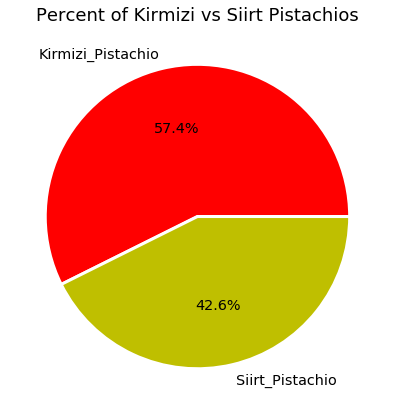

In [14]:
fig, pie_chart = plt.subplots(figsize=(7, 7))
pistachio_labels = df['Class'].unique()
pistachio_counts = df['Class'].value_counts()
colours = ['r', 'y']

pie_chart.pie(pistachio_counts, labels = pistachio_labels, colors = colours, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'})

pie_chart.set_title('Percent of Kirmizi vs Siirt Pistachios', fontsize=18)
plt.show()

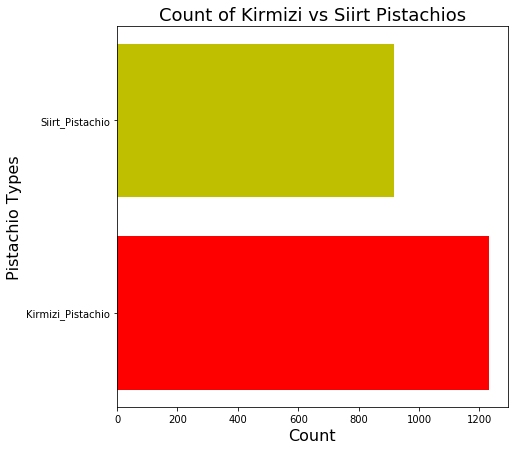

In [15]:
fig, bar_graph = plt.subplots(figsize=(7,7))

pistachio_labels = df['Class'].unique()
pistachio_counts = df['Class'].value_counts()
colours = ['r', 'y']

bar_graph.barh(pistachio_labels, pistachio_counts, label = pistachio_labels, color = colours)

bar_graph.set_ylabel('Pistachio Types', fontsize=16)
bar_graph.set_xlabel('Count', fontsize=16)
bar_graph.set_title('Count of Kirmizi vs Siirt Pistachios', fontsize=18)
plt.show()


# Section 3: Feature Engineering

Our dataset has 28 features as seen in the data analysis section. 
In this section, we have defined what each feature is. 
Based on these definitions, we identified the features that we think would be most significant in differentiating the pistachios within the dataset.

### Definitions of features present in the dataset

- 'Area':This indicates the number of pixels occupied by the image. With each image being at a standard resolution of 600 px x 600 px, it adds up each non-black pixel and gets the total value per image
- 'Perimeter': Indicates the circumference of the pistachio bean in terms of pixels for the border of the image
- 'Major Axis': This is the longest line that can be drawn within the pistachio which is the diameter going through the center of the bean.
- 'Minor Axis':Relative to the Major axis of the bean, the minor axis  is perpendicular to the major axis and takes the diameter of the bean 90 degrees from the major
- 'Eccentricity': Relative to a circle, this measures how much a shape is warped. Due to the nature of the shape of pistachios resembling ellipses, it measures the image outline relative to a circle
- 'Equivalent Diameter': Defined as 4 times the Area of the Pistachio over Pi all rooted 
- 'Solidity': This measures the extent at which the Pistachio in the image is considered to be either concave or convex
- 'Convex Area': The area in which any two points within the Pistachio bean can be connected by a continuous line that resides within the image.
- 'Extent': A/Ab *Ab = Bounding Rectangle Area – The area of the Pistachio Bean divided by a bounding Rectangle that encompasses the bean
- 'Aspect Ratio': A ratio defined by the Major axis and the minor axis relative to one another of the bean. (Major Axis / Minor Axis)
- 'Roundness': Defined as the ratio of the surface area of the Pistachio bean to the Major axis diameter as the area of a circle
- 'Compactness': Defined as the ratio of the area of the Pistachio bean to a circle with the same perimeter of the bean.
- 'Shapefactor_1': Defined as the ratio of the Major axis relative to the Area of the Pistachio bean
- 'Shapefactor_2': Defined as the ratio of the Minor axis relative to the Area of the Pistachio bean
- 'Shapefactor_3': Defined as the ratio of the Area of the pistachio relative to the area of a circle with the major axis as the diameter
- 'Shapefactor_4': Defined as the ratio of the Area of the Pistachio relative to the area of the curved surface in a cylinder
- 'Mean_RR': The average mean value of all Red pixels (from 0-255 (R,G,B)) found in the image
- 'Mean_RG' The average mean value of all Green pixels (from 0-255 (R,G,B)) found in the image
- 'Mean_RB' The average mean value of all Blue pixels (from 0-255 (R,G,B)) found in the image
- 'StdDev_RR' The standard deviation value of Red pixels (from 0-255 (R,G,B)) found in the image
- 'StdDev_RG' The standard deviation value of Green pixels (from 0-255 (R,G,B)) found in the image
- 'StdDev_RB' The standard deviation value of Blue pixels (from 0-255 (R,G,B)) found in the image
- 'Skew_RR': Skew of the Red Pixels found in the image relative to normal distribution
- 'Skew_RG': Skew of the Green Pixels found in the image relative to normal distribution
- 'Skew_RB': Skew of the Blue Pixels found in the image relative to normal distribution
- 'Kurtosis_RR':Measure of whether Red Pixels found in the image is heavy tailed/light tailed relative to normal distribution. 
- 'Kurtosis_RG': Measure of whether Green Pixels found in the image is heavy tailed/light tailed relative to normal distribution
- 'Kurtosis_RB': Measure of whether Blue Pixels found in the image is heavy tailed/light tailed relative to normal distribution



### Attributes that we think will be useful and our reasoning:



INSERT HERE


### Attributes that we think will not be useful and our reasoning


INSERT HERE

# Section 4: Encoding the features 
### Discretizing data 

We need to discretize our data for ML models that do not use continuous data. In order to discretize our data, we need to figure out how to break it down into proper categories. 

For example, we have a feature called "Area". How do we discretize that feature? What would be the best approach to divide "Area" into the correct amount of bins? 

After some research, we found about about the Freedman-Diaconis Rule which states:

bin width = $ \frac{2*IQR}{\sqrt[3]n}$

where n is the size of the data, which will be 2148 in our case. 


Using this, we can then divide (max-min) by the bin width to get number of bins needed to discretize our data.

So, for the "Area" feature we have:

IQR = 79905.500000

n = 2148

max_area = 124008.000000

min_area = 29808.000000

Then, bin width according to Freedman-Diaconis Rule would be:

area_bin_width = 12465.258

and the number of bins needed would be:

(max_area - min_area)/area_bin_width = 7.56 --> round up to 8

In [16]:
def max_min_IQR_size(col):
    # This function takes in a column name and returns 
    # it's max, min, IQR, and size from the description dataFrame
    
    return [description[col]['max'],
    description[col]['min'],
    description[col]['50%'],
    description[col]['count']]


In [17]:
def freedmanDiaconis(cols):
    # This function takes in names of the features (col names)
    # and returns the ideal number of bins it should be
    # grouped into to discretize the data according to the
    # Freedman-Diaconis Rule 
    ## note: we are taking abs of IQR as we cannot have negative bins
    ##       and some IQR values of certain features are negative  
    bins_info = {}
    for col in cols:
        info = max_min_IQR_size(col)
        maximum = info[0]
        minimum = info[1]
        IQR = info[2]
        n = info[3]
        bins_info[col] = math.ceil((maximum-minimum)/(2*abs(IQR)*(n**(-1/3))))
    return bins_info

In [18]:
bins_info = freedmanDiaconis(FEATURES)

In [30]:
bins_info

{'Area': 8,
 'Perimeter': 10,
 'Major_Axis': 4,
 'Minor_Axis': 7,
 'Eccentricity': 4,
 'Eqdiasq': 5,
 'Solidity': 3,
 'Convex_Area': 8,
 'Extent': 4,
 'Aspect_Ratio': 7,
 'Roundness': 9,
 'Compactness': 4,
 'Shapefactor_1': 11,
 'Shapefactor_2': 7,
 'Shapefactor_3': 7,
 'Shapefactor_4': 3,
 'Mean_RR': 3,
 'Mean_RG': 3,
 'Mean_RB': 3,
 'StdDev_RR': 7,
 'StdDev_RG': 7,
 'StdDev_RB': 10,
 'Skew_RR': 33,
 'Skew_RG': 39,
 'Skew_RB': 64,
 'Kurtosis_RR': 16,
 'Kurtosis_RG': 21,
 'Kurtosis_RB': 24}

In [19]:
def discretizer(cols):
    df_discretized = pd.DataFrame()
    # This function takes a list of columns and creates a new data frame
    # out of them by discretizing the given columns and adding them to 
    # a new data frame
    for col in cols:
        discretized = KBinsDiscretizer(n_bins=bins_info[col], encode='ordinal', strategy='uniform')
        discretized = discretized.fit_transform(df[[col]]).reshape(1,-1)
        df_discretized[col] = discretized[0]
    return df_discretized

In [20]:
df_discretized = discretizer(FEATURES)

In [21]:
# All the features after discretization
df_discretized

Area  Perimeter  Major_Axis  Minor_Axis  Eccentricity  Eqdiasq  \
0      2.0        3.0         1.0         2.0           2.0      2.0   
1      3.0        5.0         1.0         2.0           2.0      2.0   
2      3.0        2.0         2.0         2.0           3.0      2.0   
3      3.0        3.0         1.0         2.0           3.0      2.0   
4      4.0        2.0         2.0         2.0           3.0      3.0   
5      1.0        1.0         1.0         1.0           3.0      1.0   
6      3.0        3.0         1.0         3.0           2.0      2.0   
7      2.0        5.0         1.0         2.0           2.0      2.0   
8      2.0        6.0         2.0         2.0           3.0      2.0   
9      4.0        2.0         3.0         2.0           3.0      2.0   
10     3.0        5.0         1.0         2.0           3.0      2.0   
11     3.0        7.0         2.0         1.0           3.0      2.0   
12     4.0        1.0         2.0         2.0           3.0      3.0   
13     2.0        2.0         2.0         1.0           3.0      2.0   
14     4.0        2.0         2.0         2.0           3.0      3.0   
15     2.0        1.0         2.0         1.0           3.0      2.0   
16     4.0        1.0         2.0         2.0           3.0      3.0   
17     5.0        5.0         2.0         3.0           3.0      3.0   
18     3.0        1.0         2.0         2.0           3.0      2.0   
19     3.0        1.0         2.0         2.0           3.0      2.0   
20     4.0        2.0         2.0         3.0           2.0      3.0   
21     5.0        2.0         2.0         3.0           2.0      3.0   
22     2.0        1.0         1.0         1.0           3.0      2.0   
23     3.0        1.0         2.0         2.0           3.0      2.0   
24     0.0        2.0         0.0         0.0           3.0      0.0   
25     4.0        2.0         2.0         2.0           3.0      2.0   
26     4.0        2.0         3.0         2.0           3.0      3.0   
27     2.0        4.0         1.0         1.0           3.0      1.0   
28     5.0        2.0         3.0         2.0           3.0      3.0   
29     3.0        1.0         2.0         2.0           3.0      2.0   
30     3.0        2.0         1.0         2.0           3.0      2.0   
31     4.0        1.0         2.0         2.0           3.0      2.0   
32     4.0        1.0         2.0         2.0           3.0      2.0   
33     5.0        2.0         3.0         2.0           3.0      3.0   
34     3.0        4.0         1.0         2.0           3.0      2.0   
35     2.0        3.0         1.0         2.0           3.0      2.0   
36     4.0        2.0         3.0         2.0           3.0      3.0   
37     3.0        2.0         2.0         2.0           3.0      2.0   
38     1.0        0.0         0.0         1.0           3.0      1.0   
39     3.0        1.0         1.0         2.0           3.0      2.0   
40     4.0        2.0         2.0         2.0           3.0      3.0   
41     2.0        1.0         1.0         2.0           3.0      2.0   
42     0.0        1.0         0.0         0.0           3.0      0.0   
43     3.0        2.0         2.0         2.0           3.0      2.0   
44     5.0        1.0         3.0         3.0           3.0      3.0   
45     4.0        1.0         2.0         2.0           3.0      3.0   
46     4.0        7.0         2.0         3.0           3.0      3.0   
47     3.0        0.0         1.0         2.0           3.0      2.0   
48     3.0        1.0         2.0         1.0           3.0      2.0   
49     1.0        3.0         1.0         3.0           2.0      1.0   
50     5.0        2.0         3.0         2.0           3.0      3.0   
51     5.0        2.0         3.0         2.0           3.0      3.0   
52     5.0        2.0         3.0         2.0           3.0      3.0   
53     3.0        2.0         2.0         1.0           3.0      2.0   
54     2.0        1.0         1.0         2.0 

# Section 5: Data Preparation and Cross-Validation

Our classification will be a binary classification. 
The 2 classes are "Kirmizi_Pistachio" and "Siirt_Pistachio",

We will change "Kirmizi_Pistachio" to 0 and "Siirt_Pistachio" to 1 for the sake of prediction. 





In [22]:
df['Class'] = (df['Class'].replace("Kirmizi_Pistachio", 0).replace("Siirt_Pistachio", 1))

From our data analysis step, we know that our data is imbalanced. 
57.4% of our data is made up of Kirmizi Pistachios and 42.6% of our data is made up of Siirt Pistachios. 
Moreover, we have a relatively small dataset with only 2148 rows of data.

Based on our findings for imbalanced and small datasets, the suggested method of cross-validation is the Stratified KFold Cross-Validation.


The reason that Stratified KFold Cross-Validation is suggested for imbalanced and small datasets is because it tries to automatically balance the target variable in both the training and the testing data.
ie: "The folds are made by preserving the percentage of samples for each class

In [23]:
X = df[FEATURES]
y = df[TARGET]

X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size = 0.1)

X_discretized_training, X_discretized_testing, y_training, y_testing = train_test_split(df_discretized, y, test_size = 0.1)

In [24]:
# code to visualize Stratified K Fold Split
# link in sources

cmap_data = plt.cm.autumn
cmap_cv = plt.cm.coolwarm


def plot_cv_indices(cv, X, y, ax, n_splits, lw=25):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )


    # Formatting
    yticklabels = list(range(n_splits)) + ["class"]
    ax.set(
        yticks=np.arange(n_splits + 2) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="Fold",
        ylim=[n_splits + 2.2, -0.2],
        xlim=[-50,2200]
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=30)
    return ax


def plot_cv(cv, X, y, n_splits=5):
    this_cv = cv(n_splits=n_splits)
    fig, ax = plt.subplots(figsize=(15, 5))
    plot_cv_indices(this_cv, X, y, ax, n_splits)

    ax.legend(
        [Patch(color=cmap_cv(0.8)), Patch(color=cmap_cv(0.1)), Patch(color = cmap_data(0)), Patch(color = cmap_data(900))],
        ["Testing set", "Training set", "Kirmizi", "Siirt"],
        loc=(1.02, 0.8),
    )
    plt.tight_layout()
    fig.subplots_adjust(right=0.7)
    plt.show()
    

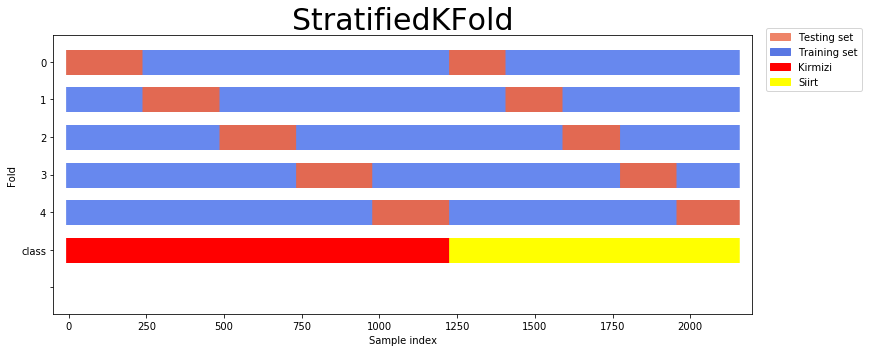

In [25]:
plot_cv(StratifiedKFold, X,y)

In [26]:
#from itertools import chain, combinations

#def powerset(iterable):
#    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
#    s = list(iterable)
#    return chain.from_iterable(combinations(s, r) for r in range(1,len(s)+1))
#powerset_features = list(powerset(FEATURES))

In [31]:
skf = StratifiedKFold(n_splits=5, shuffle = False)
fold = 0
area_under_the_curve_scores = []
accuracy_scores = []
for train_i, test_i in skf.split(df_discretized, y):
    X_discretized_training = df_discretized.loc[train_i]
    y_training = y.loc[train_i]
    X_discretized_testing = df_discretized.loc[test_i]
    y_testing = y.loc[test_i]
    classifier = GaussianNB()
    classifier.fit(X_discretized_training, y_training) # Training step
    prediction = classifier.predict(X_discretized_testing) # Testing step
    prediction_probability = classifier.predict_proba(X_discretized_testing)[:, 1]
    acc_score = accuracy_score(y_testing, prediction)
    area_under_curve_score = roc_auc_score(y_testing, prediction_probability)
    print(f'======= Fold {fold} =======')
    print(f"Accuracy Score is: {acc_score:0.4f}")
    print(f"Area Under Curve Score is: {area_under_curve_score:0.4f}")
    area_under_the_curve_scores.append(area_under_curve_score)
    accuracy_scores.append(acc_score)
    fold +=1

======= Fold 0 =======
Accuracy Score is: 0.8465
Area Under Curve Score is: 0.9233
======= Fold 1 =======
Accuracy Score is: 0.8651
Area Under Curve Score is: 0.9500
======= Fold 2 =======
Accuracy Score is: 0.8651
Area Under Curve Score is: 0.9428
======= Fold 3 =======
Accuracy Score is: 0.8671
Area Under Curve Score is: 0.9268
======= Fold 4 =======
Accuracy Score is: 0.8834
Area Under Curve Score is: 0.9572




# Section 6: Model Training

Here, we will be training the 3 models requested:
- Naïve Bayes
- Logistic Regression
- Multi-Layer Perceptron

### Part A: Training Naïve Bayes

In [27]:
# list to store Naive Bayes training models for each fold
naiveBayes_model = []

skf = StratifiedKFold(n_splits=5, shuffle = False)
fold = 0
area_under_the_curve_scores = []
accuracy_scores = []
for train_i, test_i in skf.split(df_discretized, y):
    X_discretized_training = df_discretized.loc[train_i]
    y_training = y.loc[train_i]
    X_discretized_testing = df_discretized.loc[test_i]
    y_testing = y.loc[test_i]
    classifier = GaussianNB()
    classifier.fit(X_discretized_training, y_training) # Training step

    fold +=1

### Part B: Training Logistic Regression

### Part C: Training Multi-Layer Perceptron

# Section 7: Model Testing

Here, we will be testing the 3 models we trained in the previous section:
- Naïve Bayes
- Logistic Regression
- Multi-Layer Perceptron

### Part A: Testing Naïve Bayes

In [28]:
fold = 0
area_under_the_curve_scores = []
accuracy_scores = []
for train_i, test_i in skf.split(df_discretized, y):
    prediction = naiveBayes_model[fold].predict(X_discretized_testing) # Testing step
    prediction_probability = naiveBayes_model[fold].predict_proba(X_discretized_testing)[:, 1]
    acc_score = accuracy_score(y_testing, prediction)
    area_under_curve_score = roc_auc_score(y_testing, prediction_probability)
    print(f'======= Fold {fold} =======')
    print(f"Accuracy Score is: {acc_score:0.4f}")
    print(f"Area Under Curve Score is: {area_under_curve_score:0.4f}")
    area_under_the_curve_scores.append(area_under_curve_score)
    accuracy_scores.append(acc_score)
    fold +=1

======= Fold 0 =======
Accuracy Score is: 0.8834
Area Under Curve Score is: 0.9568
======= Fold 1 =======
Accuracy Score is: 0.8811
Area Under Curve Score is: 0.9579
======= Fold 2 =======
Accuracy Score is: 0.8858
Area Under Curve Score is: 0.9577
======= Fold 3 =======
Accuracy Score is: 0.8881
Area Under Curve Score is: 0.9584
======= Fold 4 =======
Accuracy Score is: 0.8834
Area Under Curve Score is: 0.9572


In [29]:
for i in naiveBayes_model:
    print(i)

GaussianNB(priors=None, var_smoothing=1e-09)
GaussianNB(priors=None, var_smoothing=1e-09)
GaussianNB(priors=None, var_smoothing=1e-09)
GaussianNB(priors=None, var_smoothing=1e-09)
GaussianNB(priors=None, var_smoothing=1e-09)


### Part B: Testing Logistic Regression

### Part C: Testing Multi-Layer Perceptron

# Section 8: Evaluation with Precision/Recall Measures

# Section 9: Section 6-7-8 with Modified Parameters

In this section we will re-do sections 6 through 8 (inclusive) with modified parameters.
The parameters we modified are ____________???
We chose to modify these parameters because ____________???

# Section 10: Results

### Part A: Quantitative Comparison of 9 results

### Part B: Examples of Good and Bad Results

# Sources

### Dataset used:
https://www.kaggle.com/datasets/muratkokludataset/pistachio-dataset


### Citations requested by the owner of the dataset: 

OZKAN IA., KOKLU M. and SARACOGLU R. (2021). Classification of Pistachio Species Using Improved K-NN Classifier. Progress in Nutrition, Vol. 23, N. 2, pp. DOI:10.23751/pn.v23i2.9686. (Open Access) https://www.mattioli1885journals.com/index.php/progressinnutrition/article/view/9686/9178

SINGH D, TASPINAR YS, KURSUN R, CINAR I, KOKLU M, OZKAN IA, LEE H-N., (2022). Classification and Analysis of Pistachio Species with Pre-Trained Deep Learning Models, Electronics, 11 (7), 981. https://doi.org/10.3390/electronics11070981. (Open Access)


### Sources used to calculate bin sized for data discretization:
https://en.wikipedia.org/wiki/Freedman–Diaconis_rule

https://stats.stackexchange.com/questions/798/calculating-optimal-number-of-bins-in-a-histogram



### Sources used for Cross Validation:
https://www.youtube.com/watch?v=-8s9KuNo5SA

https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html

### Sources used for general pistachio information:
https://en.wikipedia.org/wiki/Pistachio

### Sources used for pictures/figures:
Figure 1: https://www.dagtarimsaldanismanlik.com/antep-fistigi-gubreleme.html

Figure 2: https://www.hepsiburada.com/plantistanbul-antep-fistigi-fidani-60-80-cm-saksida-pm-HB00000O53UC

Figure 3: http://biodels.com/content/pistachio-kernels 

Figure 4: https://www.fidandeposu.com/siirt-cesidi-antep-fistigi-fidani

Figure 5: https://www.fidandeposu.com/kirmizi-cesidi-antep-fistigi-fidani
